# Exercises in statistics

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [4]:
penguins_data = sns.load_dataset("penguins")

In [5]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
print(penguins_data.isna().sum())

penguins_data = penguins_data.dropna()

print(penguins_data.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## 1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?

In [28]:
penguins_data["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

## 2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?

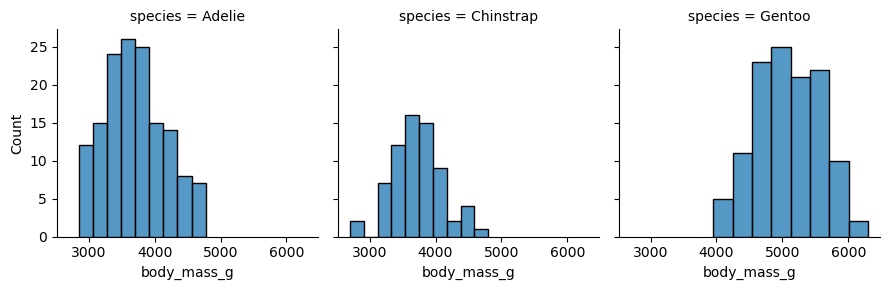

In [20]:
g=sns.FacetGrid(penguins_data, col="species")
g.map(sns.histplot, "body_mass_g")

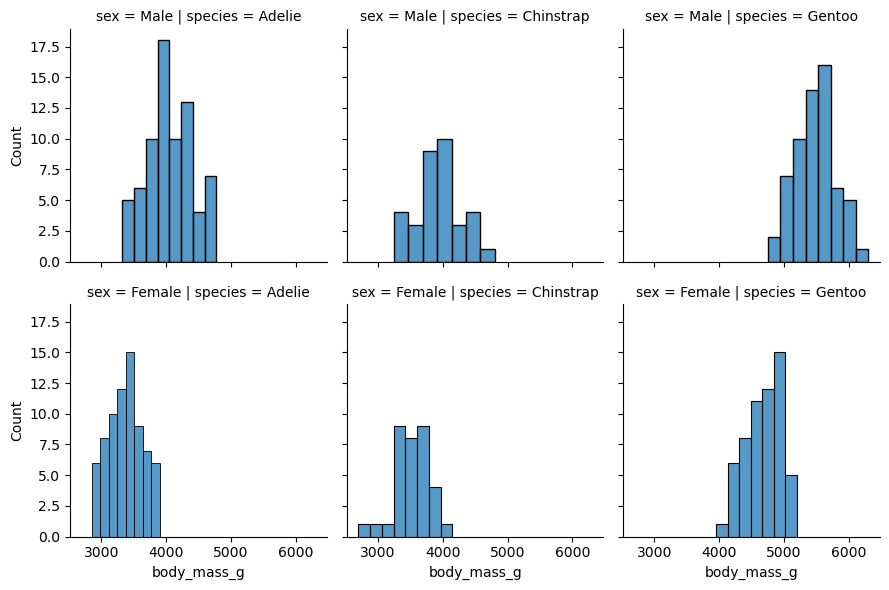

In [19]:
g=sns.FacetGrid(penguins_data, col="species", row="sex")
g.map(sns.histplot, "body_mass_g")

## 3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use.

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between penguin species and their body mass

    The alternative hypothesis is that there is a small difference of body mass between different penguin species

In [26]:
Adelie = penguins_data[penguins_data["species"]=="Adelie"]["body_mass_g"]
Chinstrap = penguins_data[penguins_data["species"]=="Chinstrap"]["body_mass_g"]

print(stats.ttest_ind(Adelie.head(20), Chinstrap.head(20)))

print(stats.ttest_ind(Adelie, Chinstrap))

TtestResult(statistic=0.19095034415279136, pvalue=0.8495810695738127, df=38.0)
TtestResult(statistic=-0.42011219955863177, pvalue=0.6748289682757558, df=212.0)


    Given the pvalue=0.8495810695738127, which is much higher than the significance level we have chosen of 0.05 for p
    we can then not reject the null hypothesis and declare that there is no significant difference between penguin species and their body mass

## 4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use.

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between penguin species and their body mass

    The alternative hypothesis is that there is a clear difference of body mass between different penguin species

In [34]:
Chinstrap = penguins_data[penguins_data["species"]=="Chinstrap"]["body_mass_g"]
Gentoo = penguins_data[penguins_data["species"]=="Gentoo"]["body_mass_g"]

print(stats.ttest_ind(Chinstrap.head(20), Gentoo.head(20)))

print(stats.ttest_ind(Chinstrap, Gentoo))

TtestResult(statistic=-8.53284675147811, pvalue=2.3110622048372052e-10, df=38.0)
TtestResult(statistic=-19.33454832714746, pvalue=2.781745579785546e-46, df=185.0)


    Given the pvalue=2.781745579785546e-46, which is much higher than the significance level we have chosen of 0.05 for p
    we can then not drop the null hypothesis and declare there is a clear difference of body mass between different penguin species

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

In [35]:
fb = pd.read_csv('../fb_like_and_share.csv', sep=";")

In [36]:
fb

,type,likes_count_fb,shares_count_fb
0,video,577,7
1,photo,2802,23
2,video,490,14
3,link,535,16
4,photo,1049,44
5,photo,1557,85
6,photo,838,1
7,status,467,4
8,photo,100,1
9,video,112,3


In [38]:
fb.isna().sum()

type               0
likes_count_fb     0
shares_count_fb    0
dtype: int64

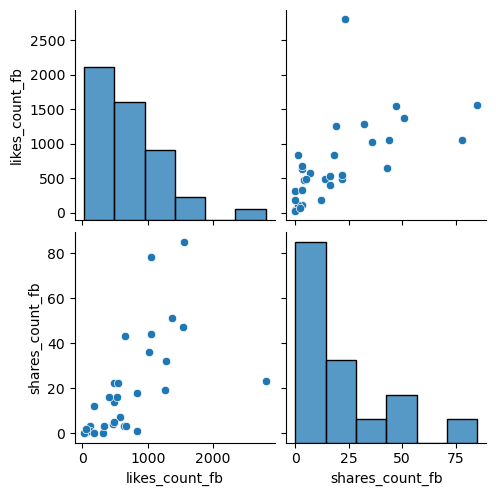

In [37]:
sns.pairplot(data = fb)

### 1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).

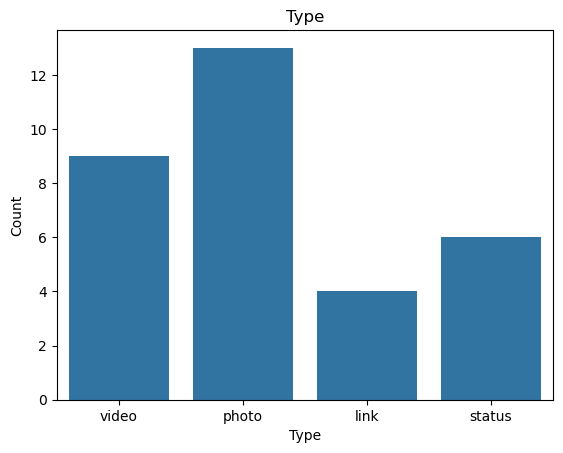

In [42]:
sns.countplot(x = "type", data = fb)
plt.title("Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

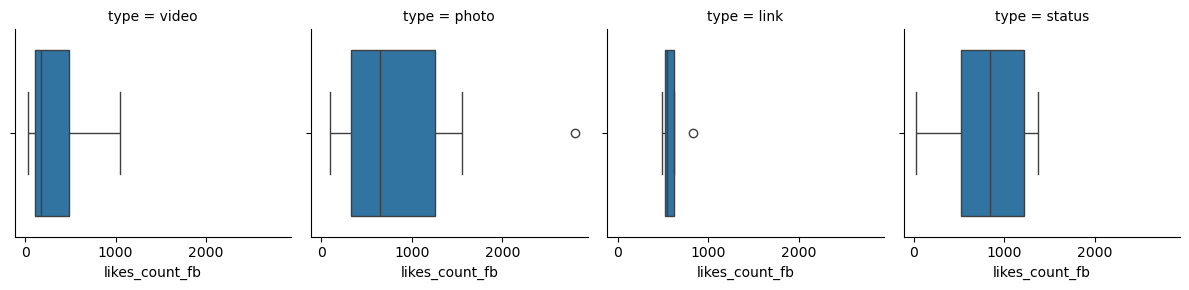

In [48]:
g=sns.FacetGrid(fb, col="type")
g.map(sns.boxplot, "likes_count_fb", order=None)

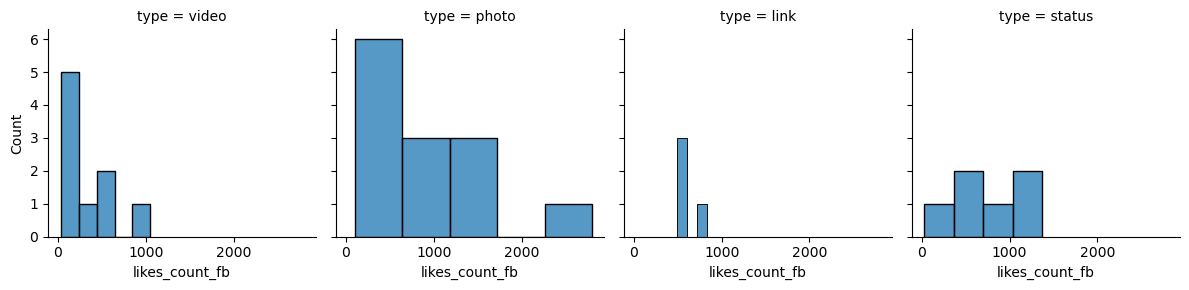

In [49]:
g=sns.FacetGrid(fb, col="type")
g.map(sns.histplot, "likes_count_fb")

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between distribution of likes for video and photo likes

    The alternative hypothesis is that there is a significant difference between distribution of likes for video and photo likes

#### Given the data is numeric, not normally distributed as seen in the graph above, and that the data is not paired and the group (video and photo) does not have the same distribution shape(13 and 9) the mannwhitneyu test is most suited to test our hypothesis

In [52]:
video = fb[fb["type"]=="video"]["likes_count_fb"]
photo = fb[fb["type"]=="photo"]["likes_count_fb"]

print(stats.ttest_ind(video.head(20), photo.head(20)))

print(stats.ttest_ind(video, photo))

TtestResult(statistic=-2.125454058083514, pvalue=0.04619850270741724, df=20.0)
TtestResult(statistic=-2.125454058083514, pvalue=0.04619850270741724, df=20.0)


In [55]:
video = fb[fb["type"]=="video"]["likes_count_fb"]
photo = fb[fb["type"]=="photo"]["likes_count_fb"]

stats.mannwhitneyu(video, photo) #TODO

MannwhitneyuResult(statistic=26.0, pvalue=0.0326063047830172)

    Given the pvalue=0.0326063047830172, which is much higher than the significance level we have chosen of 0.05 for p
    we can then not drop the null hypothesis and declare there is a clear difference of body mass between different penguin species

### 2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).

### Hypothesis, acceptable p-value less than 0.05
    The null hypothesis is that there is no significant difference between distribution of share count for video and photo likes

    The alternative hypothesis is that there is a significant difference between distribution of share count for video and photo likes

#### Given the data is numeric, not normally distributed as seen in the graph above, and that the data is not paired and the group (video and photo) does not have the same distribution shape(13 and 9) the mannwhitneyu test is most suited to test our hypothesis

In [56]:
video = fb[fb["type"]=="video"]["shares_count_fb"]
photo = fb[fb["type"]=="photo"]["shares_count_fb"]

stats.mannwhitneyu(video, photo) #TODO

MannwhitneyuResult(statistic=42.0, pvalue=0.28368085995763015)

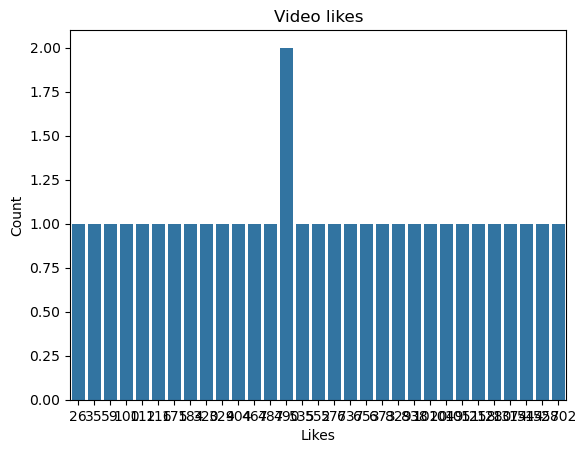

In [39]:
sns.countplot(x = "likes_count_fb", data = fb)
plt.title("Video likes")
plt.xlabel("Likes")
plt.ylabel("Count")
plt.show()

### 4. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?

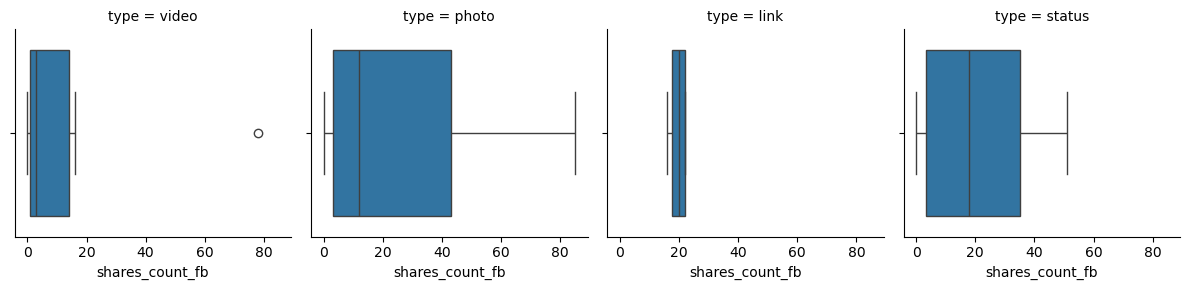

In [57]:
g=sns.FacetGrid(fb, col="type")
g.map(sns.boxplot, "shares_count_fb", order=None)

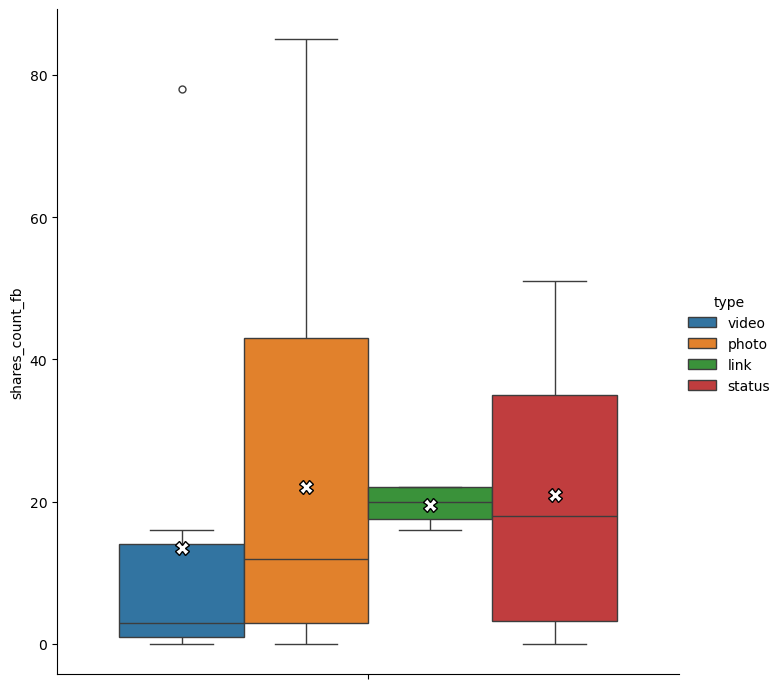

In [60]:
sns.catplot(y="shares_count_fb", hue = "type", data = fb, kind="box", height = 7,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

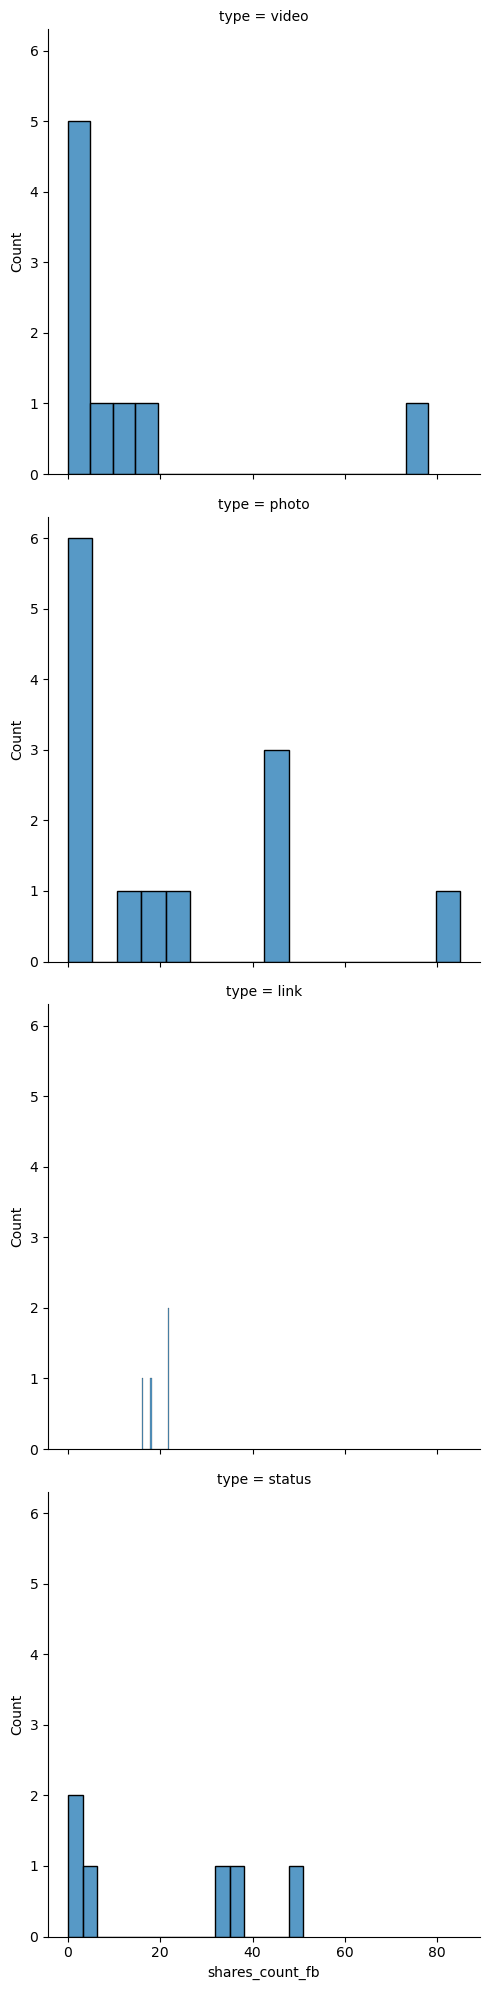

In [59]:
g=sns.FacetGrid(fb, row="type", height = 5)
g.map(sns.histplot, "shares_count_fb", bins = 16)
plt.show()

In [58]:
video = fb[fb["type"]=="video"]["shares_count_fb"]
photo = fb[fb["type"]=="photo"]["shares_count_fb"]
link = fb[fb["type"]=="link"]["shares_count_fb"]
status = fb[fb["type"]=="status"]["shares_count_fb"]

stats.f_oneway(video, photo, link, status) 

F_onewayResult(statistic=0.2558147061883985, pvalue=0.8565314091757278)

    so pvalue=0.8565314091757278, which means what? that there is a no significant difference in their mean value? doesn't look like that tough

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time